# Ejecución Tarea Week 3 

## Lectura y manejo de los datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Cargamos el conjunto de datos 'athlete_events.csv' en un DataFrame llamado 'sports_df' utilizando pandas.

In [4]:
sports_df = pd.read_csv('athlete_events.csv')
sports_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Usamos el método info() para obtener información sobre el conjunto de datos, como el número de filas, columnas y tipos de datos para empezar el análisis.

In [5]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Filtramos el DataFrame 'sports_df' para incluir solo los registros de los ganadores de medallas en el año 2016.

In [6]:
sports_2016 = sports_df[(sports_df['Year'] == 2016) & (sports_df['Medal'].notna())] # Filtro para ganadores de medallas de 2016
# Ennumerar los cinco deportes con más medallas
medals_by_sport = sports_2016['Sport'].value_counts() # Value_counts() para contar el número de medallas en cada deporte
top_5_sports = medals_by_sport.head(5)
top_5_sports.head(5)

Sport
Athletics    192
Swimming     191
Rowing       144
Football     106
Hockey        99
Name: count, dtype: int64

Filtramos el DataFrame 'sports_2016' para incluir solo los registros de los cinco deportes principales almacenados en 'top_5_sports'.

In [7]:
top_5_df = sports_2016[sports_2016['Sport'].isin(top_5_sports.index)]
top_5_df.describe(include=object) # Revisar estadisticas de variables categóricas para confirmar que hay 5 únicos en Sport

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,732,732,732,732,732,732,732,732,732,732
unique,648,2,54,54,1,1,1,5,99,3
top,"Michael Fred Phelps, II",M,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics,Football Women's Football,Gold
freq,6,377,127,127,732,732,732,192,54,254


## Gráficos

1. Gráfico de barras con los recuentos de cada uno de los deportes del top 5 en 2016

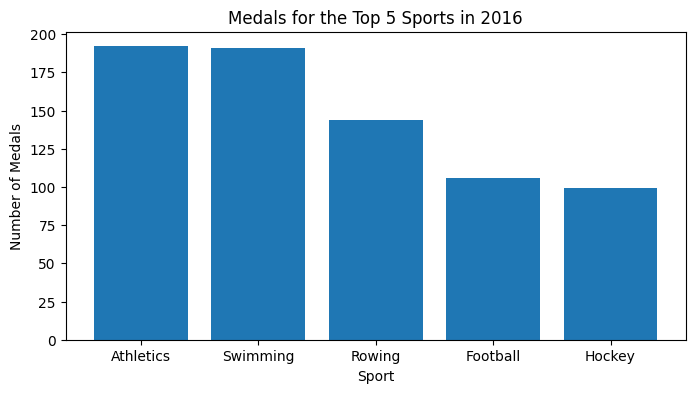

In [8]:
plt.figure(figsize=(8, 4))
plt.bar(top_5_sports.index, top_5_sports.values)
plt.xlabel('Sport', fontsize=10)
plt.ylabel('Number of Medals', fontsize=10)
plt.title('Medals for the Top 5 Sports in 2016', fontsize=12)
plt.show()

2. Histograma para la característica 'Edad' de todos los ganadores de medallas en deportes del top 5 (2016)

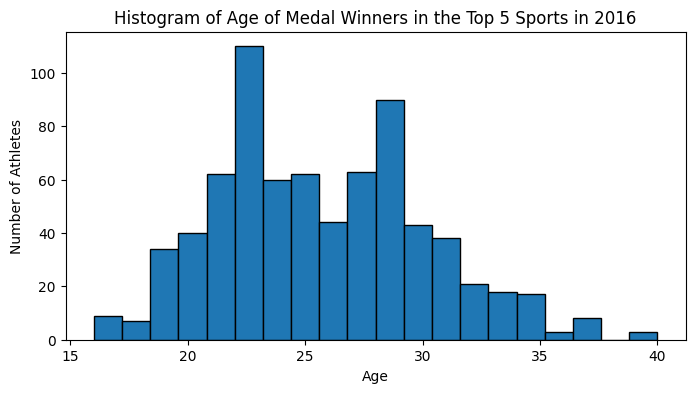

count    732.000000
mean      25.577869
std        4.451373
min       16.000000
25%       22.000000
50%       25.000000
75%       29.000000
max       40.000000
Name: Age, dtype: float64

In [9]:
plt.figure(figsize=(8, 4))
plt.hist(top_5_df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Number of Athletes', fontsize=10)
plt.title('Histogram of Age of Medal Winners in the Top 5 Sports in 2016', fontsize=12)
plt.show()
top_5_df['Age'].describe()

El histograma representa la edad de los atletas ganadores de medallas en los cinco deportes principales de 2016. La mayoría de los atletas tienen edades entre 22 y 29 años, con una edad promedio de aproximadamente 25.58 años y una desviación estándar de 4.45 años. No hubo atletas menores de 16 ni mayores de 40 años ganando medallas en 2016. La distribución es ligeramente asimétrica hacia la derecha.

3. Gráfico de barras que indica cuántas medallas ganó el equipo de cada país en el top 5 de 2016

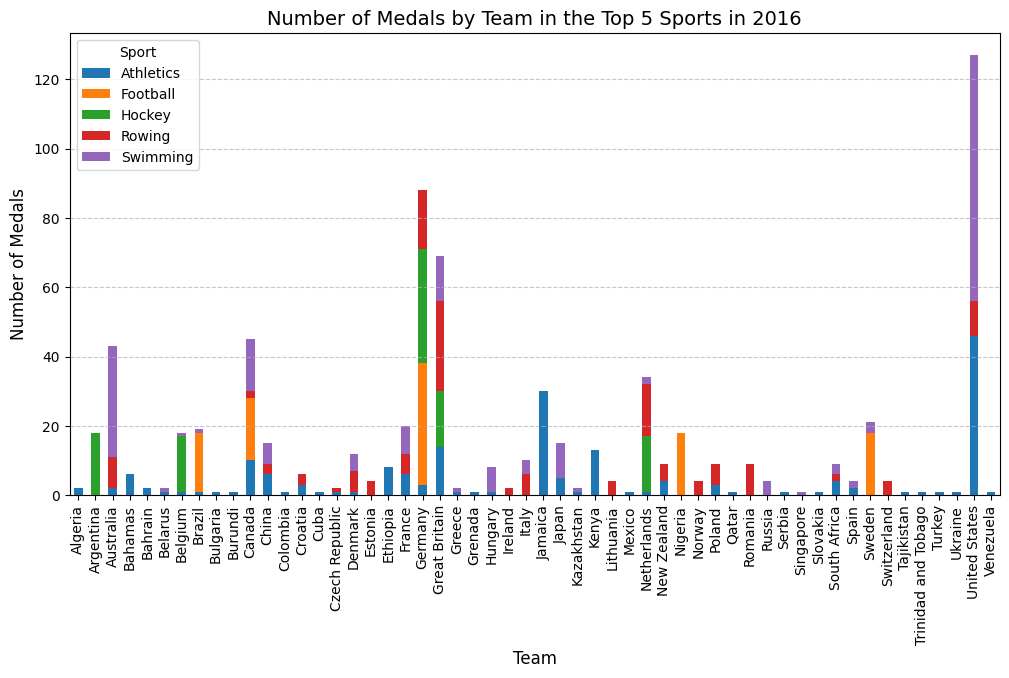

In [10]:
# Se utiliza gruopby para agrupar los datos de top_5 por las columnas Team y Sport.
# Además, se selcciona la columna Medal y se cuenta el numero de medallas por cada combinación de Sport y Team
team_medals = top_5_df.groupby(['Team', 'Sport'])['Medal'].count().unstack().fillna(0)   # Unstack organiza los resultados del conteo Team filas y Sport Columnas
# Fillna  rellena los valores faltantes de la tabla organizada con ceros
team_medals.plot(kind='bar', stacked=True, figsize=(12, 6)) # Se grafica el resultado de la tabla, stacked true indica que las barras se apilarán
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.title('Number of Medals by Team in the Top 5 Sports in 2016', fontsize=14)
plt.legend(title='Sport',  loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El gráfico muestra cómo se distribuyen las medallas en cinco deportes específicos (Atletismo, Fútbol, Hockey, Remo y Natación) entre varios equipos (países) durante los Juegos Olímpicos de 2016. Las barras en el gráfico están apiladas, lo que significa que cada barra representa la suma total de medallas de un equipo en esos cinco deportes. Las diferentes secciones de cada barra corresponden a los deportes individuales, y la altura total de la barra representa el número total de medallas ganadas por el equipo en esos deportes. Destacan países como Estados Unidos, Alemaia y Gran Bretaña con la mayor cantidad de medallas y en general se observa la presencia de Atletismo en casi todos los países.

4. Gráfico de barras que indique el peso medio de los ganadores del top 5, en función del género

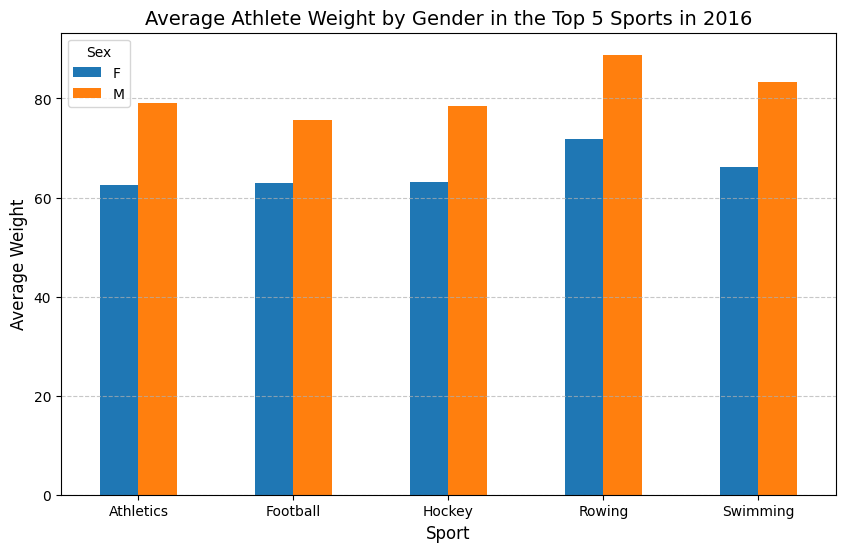

In [11]:
# Calcular el peso promedio por género para los cinco deportes principales en 2016
avg_weight_by_gender = top_5_df.groupby(['Sport', 'Sex'])['Weight'].mean().unstack()
avg_weight_by_gender.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Average Weight', fontsize=12)
plt.title('Average Athlete Weight by Gender in the Top 5 Sports in 2016', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El gráfico muestra el peso promedio de los atletas en los cinco deportes principales de 2016, desglosado por género. Cada deporte se representa en el eje X, y en el eje Y se encuentra el peso promedio. Se observa que en todos los deportes, los atletas masculinos tienden a tener un peso promedio mayor en comparación con las atletas femeninas. 